# SVM Exercises

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import metrics

Load Pima diabetes dataset

In [ ]:
url = "https://raw.githubusercontent.com/BeaverWorksMedlytics2020/Data_Public/master/NotebookExampleData/Week1/diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

data = pd.read_csv(url, names = names)
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Split data into training, colidation, and test sets with a test size of 25%

In [ ]:
# YOUR CODE HERE

data = pd.read_csv(url, names=names)

X_cols = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']

y_col = 'class'

test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(data[X_cols], data[y_col], test_size=test_size, random_state=0)

# Further split X and y of training into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size, random_state=0)

Create a model with sklearn's SVC and a high gamma value (perhaps 1.0)

In [ ]:
# YOUR CODE HERE

svm = SVC(gamma=1.0)

svm.fit(X_train, y_train)

SVC(gamma=1.0)

Print accuracy of training and validation data

In [ ]:
# YOUR CODE HERE

y_train_pred=svm.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=svm.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

Training Accuracy is  100.0
Validation Accuracy is  61.80555555555556


Create a model with sklearn's SVC and a low gamma value (perhaps .001)

In [ ]:
# YOUR CODE HERE

svm = SVC(gamma=0.001)

svm.fit(X_train, y_train)

SVC(gamma=0.001)

Print accuracy of training and validation data

In [ ]:
# YOUR CODE HERE

y_train_pred=svm.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=svm.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

Training Accuracy is  83.33333333333334
Validation Accuracy is  70.83333333333334


Explain the accuracy results below. 

The model is overfitting for the gamma of 1, which explains the validation accuracy of 62%.

Print the confusion matrices for your high and low gamma models (both numeric and visualized)

<ipython-input-9-3aa0d7162dc9>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels, fontsize=16)
<ipython-input-9-3aa0d7162dc9>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels, fontsize=16)


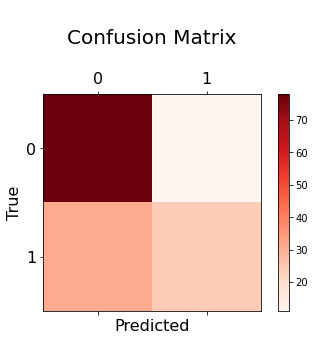

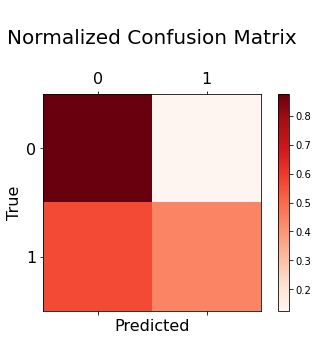

In [ ]:
# YOUR CODE HERE
#must make indv for the diff gammas and make it visual (colored?)
labels = [0,1]
cm = metrics.confusion_matrix(y_val, y_val_pred, labels = labels)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# Visualize the confusion matrix
def plot_cmatrix(cm,labels,title='Confusion Matrix'):
  fig = plt.figure()
  ax = fig.add_subplot(111)
  cax = ax.matshow(cm,cmap='Reds')
  plt.title('\n'+title+'\n', fontsize=20)
  fig.colorbar(cax)
  ax.set_xticklabels([''] + labels, fontsize=16)
  ax.set_yticklabels([''] + labels, fontsize=16)
  plt.xlabel('Predicted', fontsize=16)
  plt.ylabel('True', fontsize=16)
  plt.show()
  
plot_cmatrix(cm,labels)
plot_cmatrix(cm_norm,labels,title='Normalized Confusion Matrix')


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9446f8c5-deb5-4bdf-82fd-6a036c80b295' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>